# MIA attacks on Length-of-Stay predictor, Gated Recurrent Unit with Decay (GRU-D)
## Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from torch import zeros

import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from utils.data_processing import get_mimic_dataset, get_mimic_dataloaders

In [3]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

train_frac = 0.4
valid_frac = 0.0
test_frac = 0.0
early_stop_frac = 0.4
batch_size = 59
flatten = False # If LR, flatten the data

dataset, train_indices, validation_indices, test_indices, early_stop_indices= get_mimic_dataset(path,
                                                                            train_frac , 
                                                                            valid_frac,
                                                                            test_frac,
                                                                            early_stop_frac,
                                                                            flatten)

/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:205: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df_out.loc[:,idx[:,'mean']] = df_out.loc[:,idx[:,'mean']].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:205: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_out.loc[:,idx[:,'mean']] = df_out.loc[:,idx[:,'mean']].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:207: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  ).groupby(ID_

Saved dataset to /home/fazeleh/LeakPro/examples/mia/LOS/data/unflattened/dataset.pkl
Saved train and test indices to /home/fazeleh/LeakPro/examples/mia/LOS/data/unflattened/indices.pkl


In [4]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                                                            train_indices, 
                                                            validation_indices, 
                                                            test_indices,
                                                            early_stop_indices,
                                                            batch_size)

The best parameter is set based on 

In [5]:
best_hyperparams ={
    'cell_size': 58,
    'hidden_size': 40, 
    'learning_rate': 0.004738759319792616,
    'num_epochs':37,
    'patience': 5,
    'batch_size': 59,
    'seed': 4410,
    'min_delta': 0.0001,
    }
n_features = int(dataset.x.shape[1]/3)
X_mean = zeros(1,dataset.x.shape[2],n_features)

model_params = {k: best_hyperparams[k] for k in ['cell_size', 'hidden_size', 'batch_size']}

# Add other required parameters to model_params
model_params.update({
    'input_size': n_features,
    'X_mean': X_mean,
    'output_last': False
})

In [6]:
from tqdm import tqdm
from utils.model_grud import *

# Initialize the model with filtered parameters
model = GRUD(**model_params)

# Train the model with Train_Model function
train_losses, test_losses , train_acc, test_acc = gru_trained_model_and_metadata(
            model, train_loader, early_stop_loader,
            epochs=best_hyperparams['num_epochs'], 
            patience=best_hyperparams['patience'], 
            min_delta = best_hyperparams['min_delta'],
            learning_rate=best_hyperparams['learning_rate'], 
            batch_size=best_hyperparams['batch_size'],  # This might be used in your dataloaders, not directly in Train_Model
             metadata = None)

Model Structure:  GRUD(
  (zl): Linear(in_features=248, out_features=40, bias=True)
  (rl): Linear(in_features=248, out_features=40, bias=True)
  (hl): Linear(in_features=248, out_features=40, bias=True)
  (gamma_x_l): FilterLinear(in_features=104, out_features=104, bias=True)
  (gamma_h_l): Linear(in_features=104, out_features=40, bias=True)
  (fc): Linear(in_features=40, out_features=2, bias=True)
  (bn): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
Start Training ... 
Output type dermined by the model


Training Progress:   3%|▎         | 1/37 [00:06<04:06,  6.85s/it]

Epoch 0: Validation loss improved to 0.5862
Epoch: 0, train_loss: 0.72232474, valid_loss: 0.58623809, time: 6.86


Training Progress:   5%|▌         | 2/37 [00:12<03:39,  6.26s/it]

Epoch 1: Validation loss improved to 0.5809
Epoch: 1, train_loss: 0.62801906, valid_loss: 0.58086139, time: 5.85


Training Progress:   8%|▊         | 3/37 [00:18<03:26,  6.09s/it]

Epoch 2: Validation loss improved to 0.5585
Epoch: 2, train_loss: 0.6137067, valid_loss: 0.55853242, time: 5.88


Training Progress:  11%|█         | 4/37 [00:24<03:18,  6.00s/it]

Epoch 3: No improvement. Patience counter: 1/5
Epoch: 3, train_loss: 0.60565487, valid_loss: 0.56130606, time: 5.88


Training Progress:  14%|█▎        | 5/37 [00:30<03:10,  5.96s/it]

Epoch 4: No improvement. Patience counter: 2/5
Epoch: 4, train_loss: 0.58623467, valid_loss: 0.60618716, time: 5.89


Training Progress:  16%|█▌        | 6/37 [00:36<03:03,  5.93s/it]

Epoch 5: No improvement. Patience counter: 3/5
Epoch: 5, train_loss: 0.56606253, valid_loss: 0.56500095, time: 5.88


Training Progress:  19%|█▉        | 7/37 [00:42<02:57,  5.93s/it]

Epoch 6: No improvement. Patience counter: 4/5
Epoch: 6, train_loss: 0.54967472, valid_loss: 0.61035186, time: 5.92


Training Progress:  19%|█▉        | 7/37 [00:48<03:25,  6.86s/it]

Epoch 7: No improvement. Patience counter: 5/5
Early stopping at epoch 7. Best validation loss: 0.5585


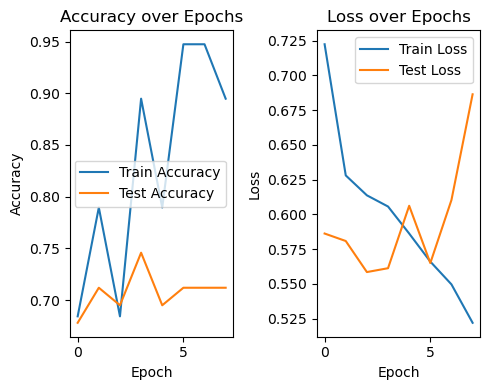

In [7]:
import matplotlib.pyplot as plt

# Convert losses to numpy-compatible lists directly
train_losses_cpu = [float(loss) for loss in train_losses]
test_losses_cpu = [float(loss) for loss in test_losses]

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

##  Attacking the GRUD model
Modify ```audit.yaml ``` file to attack GRUD model: 
  
  ```
  module_path: "utils/grud.py" 
  model_class: "GRUD"
  target_folder: "./target_GRUD"
  data_path: "./data/unflattened/dataset.pkl"
  ```

In [8]:
from mimic_gru_handler import MimicInputHandlerGRU

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandlerGRU, config_path)

# Run the audit 
leakpro.run_audit(return_results=True)

2024-12-17 13:02:29,285 INFO     Target model blueprint created from GRUD in utils/grud.py.
2024-12-17 13:02:29,293 INFO     Loaded target model metadata from ./target_GRUD/model_metadata.pkl
2024-12-17 13:02:29,297 INFO     Loaded target model from ./target_GRUD
2024-12-17 13:02:30,508 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-17 13:02:30,510 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-17 13:02:30,510 INFO     Creating shadow model handler singleton
2024-12-17 13:02:30,516 INFO     Created folder ./leakpro_output/attack_objects/shadow_model
2024-12-17 13:02:30,517 INFO     Creating distillation model handler singleton
2024-12-17 13:02:30,521 INFO     Created folder ./leakpro_output/attack_objects/distillation_model
2024-12-17 13:02:30,524 INFO     Configuring RMIA attack
2024-12-17 13:02:30,525 INFO     Added attack: rmia
2024-12-17 13:02:30,525 INFO     Added attack: lira
2024-12-17 13:02:30,526 INFO     Preparin

## Report Genrating

In [ ]:

# Import and initialize ReportHandler
from leakpro.reporting.report_handler import ReportHandler
from leakpro.synthetic_data_attacks.inference_utils import inference_risk_evaluation


# report_handler = ReportHandler()
report_handler = ReportHandler(report_dir="./leakpro_output/results")

# Save MIA resuls using report handler
for res in mia_results:
    report_handler.save_results(attack_name=res.attack_name, result_data=res, config=res.configs)